**Impartial and Unbiased Apportionment: 1960-2020 census data analysis**\
Ross Hyman

Supplement to\
**Impartial and Unbiased Apportionment: Meeting the Ideal of One Person One Vote**\
https://arxiv.org/abs/2201.11787 by Ross Hyman and Nicolaus Tideman

We develop two classes of Congressional apportionment methods that we call **impartial methods** and **unbiased methods**.

**Impartial methods** apportion the same number of seats to families of states containing the same total population, whether a family consists of a large number of small-population states or a small number of large-population states.

**Unbiased methods** apportion seats so that if states are drawn repeatedly from the same distribution, then the expected value of the total number of seats apportioned to each family equals the expected value of the total divisor-method quota for that family. 

In this notebook we apply these methods along with conventional methods to census populations from 1960 to 2020. In each of these years, fifty states are apportioned a total of 435 seats.


**Background** 
Every ten years, the U.S. House of Representatives is reapportioned according to the census for that decade. The Constitution specifies that "Representatives shall be apportioned among the several States according to their respective numbers" but prescribes no method to accomplish this. It is not a simple matter of multiplying the total number of seats in the House by each state's fraction of the population, since the resulting numbers of seats will generally not be integers. Many apportionment methods that assign each state an integer number of seats have been proposed, including methods proposed by Thomas Jefferson, John Quincy Adams, Alexander Hamilton, and Daniel Webster. Due to the political implications of the gain or loss of even one seat, disputes over apportionment methods have occurred many times, on the grounds that a proposed method is biased against states with small or large populations. The first such dispute resulted in George Washington's first veto. The last such dispute, over the apportionment for the 1990 census, went to the Supreme Court.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from scipy.stats import lognorm
from scipy.stats import uniform

The census data is downloadable at https://www.census.gov/data/tables/2020/dec/2020-apportionment-data.html

In [2]:
df = pd.read_excel('apportionment-2020-tableC2.xlsx')
df


,U.S. Department of Commerce,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,This cell is intentionally blank.,...,Unnamed: 43,Unnamed: 44,This cell is intentionally blank..4,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,U.S. Census Bureau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Table C2. Apportionment Population and Number ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table C2. Apportionment Population and Number ...,...,NaN,NaN,Table C2. Apportionment Population and Number ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,State,2020,NaN,NaN,NaN,2010,NaN,NaN,NaN,State,...,NaN,NaN,State,1920 2,NaN,NaN,1910 3,NaN,NaN,NaN
3,NaN,2020: Apportionment population,2020: \nNumber of representatives,2020: \nSeat change,2020: Average persons per representative,2010: Apportionment population,2010: \nNumber of representatives,2010: \nSeat change,2010: Average persons per representative,NaN,...,1930: \nSeat change,1930: Average persons per representative,NaN,1920: Apportionment population,1920: \nNumber of representatives,1920: Average persons per representative,1910: Apportionment population,1910: \nNumber of representatives,1910: \nSeat change\n(since 1900),1910: Average persons per representative
4,Alabama,5030053,7,0,718579,4802982,7,0,686140,Alabama,...,-1,294027,Alabama,2348174,10,234817,2138093,10,1,213809
5,Alaska,736081,1,0,736081,721523,1,0,721523,Alaska,...,X,X,Alaska,X,X,X,X,X,X,X
6,Arizona,7158923,9,0,795436,6412700,9,1,712522,Arizona,...,0,389375,Arizona,309495,1,309495,X,X,X,X
7,Arkansas,3013756,4,0,753439,2926229,4,0,731557,Arkansas,...,0,264921,Arkansas,1752204,7,250315,1574449,7,0,224921
8,California,39576757,52,-1,761091,37341989,53,0,704566,California,...,9,283412,California,3426031,11,311457,2376561,11,3,216051
9,Colorado,5782171,8,1,722771,5044930,7,0,720704,Colorado,...,0,258712,Colorado,939161,4,234790,798572,4,1,199643


The population data are in the columns in which the second row is a number.

In [3]:
df.columns = df.iloc[2]
states=df.iloc[:,0]
df = df[[2020,2010,2000,1990,1980,1970,'1960 1']].iloc[4:-3].astype('float')
df['State'] = states
df.set_index('State',inplace=True)
df.rename({'1960 1':1960},axis=1,inplace=True)
df.columns.name = ''
df

,2020,2010,2000,1990,1980,1970,1960
State,,,,,,,
Alabama,5030053.0,4802982.0,4461130.0,4062608.0,3890061.0,3475885.0,3266740.0
Alaska,736081.0,721523.0,628933.0,551947.0,400481.0,304067.0,226167.0
Arizona,7158923.0,6412700.0,5140683.0,3677985.0,2717866.0,1787620.0,1302161.0
Arkansas,3013756.0,2926229.0,2679733.0,2362239.0,2285513.0,1942303.0,1786272.0
California,39576757.0,37341989.0,33930798.0,29839250.0,23668562.0,20098863.0,15717204.0
Colorado,5782171.0,5044930.0,4311882.0,3307912.0,2888834.0,2226771.0,1753947.0
Connecticut,3608298.0,3581628.0,3409535.0,3295669.0,3107576.0,3050693.0,2535234.0
Delaware,990837.0,900877.0,785068.0,668696.0,595225.0,551928.0,446292.0
Florida,21570527.0,18900773.0,16028890.0,13003362.0,9739992.0,6855702.0,4951560.0


Now we are ready to apportion seats to states. If we didn't have to round we could scale each population by 435/(total population). We call the scaled population the state's quota.

In [4]:
stot=435
quota = pd.DataFrame()
quota = (df*stot/df.sum())
quota.loc['total'] = quota.sum()
print(quota)

                      2020        2010        2000        1990        1980  \
State                                                                        
Alabama           6.608328    6.757467    6.895611    7.096678    7.491910   
Alaska            0.967040    1.015134    0.972148    0.964157    0.771291   
Arizona           9.405171    9.022231    7.946002    6.424808    5.234367   
Arkansas          3.959379    4.117004    4.142089    4.126426    4.401694   
California       51.994717   52.537626   52.447154   52.124041   45.583536   
Colorado          7.596437    7.097872    6.664917    5.778354    5.563636   
Connecticut       4.740470    5.039106    5.270150    5.756967    5.984914   
Delaware          1.301731    1.267472    1.213487    1.168097    1.146350   
Florida          28.338690   26.592096   24.776006   22.714638   18.758355   
Georgia          14.090533   13.686020   12.685599   11.369089   10.523686   
Hawaii            1.918283    1.923081    1.880575    1.948192  

If we round the quota with convention rounding at 0.5 the total number of states is not guaranteed to be 435.

In [5]:
stot=435
naiveapprtionment = pd.DataFrame()
naiveapportionment = (df*stot/df.sum()).apply(np.round).astype('int')
naiveapportionment.loc['total'] = naiveapportionment.sum()
print(naiveapportionment)

                2020  2010  2000  1990  1980  1970  1960
State                                                   
Alabama            7     7     7     7     7     7     8
Alaska             1     1     1     1     1     1     1
Arizona            9     9     8     6     5     4     3
Arkansas           4     4     4     4     4     4     4
California        52    53    52    52    46    43    38
Colorado           8     7     7     6     6     5     4
Connecticut        5     5     5     6     6     7     6
Delaware           1     1     1     1     1     1     1
Florida           28    27    25    23    19    15    12
Georgia           14    14    13    11    11    10    10
Hawaii             2     2     2     2     2     2     2
Idaho              2     2     2     2     2     2     2
Illinois          17    18    19    20    22    24    25
Indiana            9     9     9    10    11    11    11
Iowa               4     4     5     5     6     6     7
Kansas             4     4     

While this worked fine for 2020. For every other year the total number of seats differs from the desired 435. How to round so that the total remains fixed and to do so in a way that is fair to each state is the apportionment problem. Alexander Hamilton proposed adjusting the rounding either above or below 0.5 until the desired number of total seats is achieved. Hamilton's method is coded below in three cells. The first cell adjusts the rounding. The second cell applies the rounding and the third applies the method to the census data.

In [6]:
def hamilton_method(population, s_tot, apportionment_function):
    #Rounding occures at the average of r_small and r_big. These are adjusted until the desired number 
    #of seats is achieved.
    r_small = 0.0
    r_big= 1.0
    s_out=0
    seats = np.empty(len(population))
    while s_out != s_tot :
        r = (r_big+r_small)/2
        seats = apportionment_function(population,s_tot,r)
        s_out=np.sum(seats)
        if s_out > s_tot: 
            #if the number of seats is too big move the rounding mark up so that more seats are rounded down.
            r_small=r
        elif s_out<s_tot:
            #if the number of seats is to small move the rounding mark down so that more seats are rounded up.
            r_big = r
        else: 
            return s_tot, seats
        

In [7]:
def hamilton_for_states(population,s_in,r):
    quota = np.array(population*s_in/np.sum(population),dtype='float64')
    lower = np.floor(quota,dtype='float64')
    rounding_mark = lower + r
    seats = lower +np.heaviside(quota-rounding_mark,1)
    return seats
    

In [8]:
hamilton = pd.DataFrame()
for j in [2020,2010,2000,1990,1980,1970,1960]:
    apportionment=pd.DataFrame()
    apportionment['pop'] = df[j]
    s_tot=435
    Ham_s_in, Ham_seats = hamilton_method(apportionment['pop'], s_tot,hamilton_for_states)
    hamilton[j] =Ham_seats.astype('int')
hamilton.index=df.index
hamilton.loc['total'] = hamilton.sum()
print(hamilton)

                2020  2010  2000  1990  1980  1970  1960
State                                                   
Alabama            7     7     7     7     7     7     8
Alaska             1     1     1     1     1     1     1
Arizona            9     9     8     6     5     4     3
Arkansas           4     4     4     4     4     4     4
California        52    53    52    52    46    43    38
Colorado           8     7     7     6     6     5     4
Connecticut        5     5     5     6     6     7     6
Delaware           1     1     1     1     1     1     1
Florida           28    27    25    23    19    15    12
Georgia           14    14    13    11    10    10    10
Hawaii             2     2     2     2     2     2     2
Idaho              2     2     2     2     2     2     2
Illinois          17    18    19    20    22    24    25
Indiana            9     9     9    10    11    11    11
Iowa               4     4     5     5     6     6     7
Kansas             4     4     

Hamilton's method assures the correct total number of seats but a problem with the method is that the number of seats apportioned to a state can go down when the total number of seats goes up. Consider 2020 census data for 435 to 437 seats.

In [9]:
hamilton2020 = pd.DataFrame()
for s_tot in range(435,438):
    apportionment=pd.DataFrame()
    apportionment['pop'] = df[2020]
    Ham_s_in, Ham_seats = hamilton_method(apportionment['pop'], s_tot,hamilton_for_states)
    hamilton2020[s_tot] =Ham_seats.astype('int')
hamilton2020.index=df.index
hamilton2020.loc['total'] = hamilton2020.sum()
print(hamilton2020)

                435  436  437
State                        
Alabama           7    7    7
Alaska            1    1    1
Arizona           9    9    9
Arkansas          4    4    4
California       52   52   52
Colorado          8    8    8
Connecticut       5    5    5
Delaware          1    1    1
Florida          28   28   29
Georgia          14   14   14
Hawaii            2    2    2
Idaho             2    2    2
Illinois         17   17   17
Indiana           9    9    9
Iowa              4    4    4
Kansas            4    4    4
Kentucky          6    6    6
Louisiana         6    6    6
Maine             2    2    2
Maryland          8    8    8
Massachusetts     9    9    9
Michigan         13   13   13
Minnesota         8    8    8
Mississippi       4    4    4
Missouri          8    8    8
Montana           1    1    1
Nebraska          3    3    3
Nevada            4    4    4
New Hampshire     2    2    2
New Jersey       12   12   12
New Mexico        3    3    3
New York  

Rhode Island is apportioned 1 seat out of 435, 2 seats out of 436, but back down to 1 seat out of 437. Hamilton's method has an additional problem that adding states and an appropriate number of seats can cause other states to loose or gain seats.

Hamilton's rival Jefferson proposed a method that does not suffer these problems. Jefferson proposed taking each population and multiplying it by a scale factor s_in/(total population), rounding **down**, and then adjusting s_in until the desired number of total seats is achieved. Jefferson's method is coded below in three cells. The first cell adjusts the s_in. The second cell applies the downward always rounding, and the third applies the method to the census data.

In [10]:
def divisor_method(population, s_tot, apportionment_function,beta=1,pop_g=1,sigma=1):
    s_in = s_tot
    s_small = 0
    s_big= s_tot*2
    s_out=0
    seats = np.empty(len(population))
    while s_out != s_tot :
        seats = apportionment_function(population,s_in,beta,pop_g,sigma)
        s_out=np.sum(seats)
        if s_out > s_tot: 
            s_big = s_in
            #if s_out is too big reduce s_in
            s_in = max([(s_small+s_in)/2,s_in-1])
        elif s_out<s_tot:
            s_small = s_in
            #if s_out is too small increase s_in
            s_in = min([(s_big+s_in)/2,s_in+1])
        else: return s_in, seats
        


In [11]:
def jefferson(population,s_in,beta=1,pop_g=1,sigma=1) :
    quota = np.array(population*s_in/np.sum(population),dtype='float64')
    seats = np.floor(quota,dtype='float64')
    return seats

In [12]:
jeffersondata = pd.DataFrame()
for j in [2020,2010,2000,1990,1980,1970,1960]:
    apportionment=pd.DataFrame()
    apportionment['pop'] = df[j]
    s_tot=435
    Jefferson_s_in, Jefferson_seats = divisor_method(apportionment['pop'], s_tot,jefferson)
    jeffersondata[j] =Jefferson_seats.astype('int')
jeffersondata.index=df.index
jeffersondata.loc['total'] = jeffersondata.sum()
print(jeffersondata)

                2020  2010  2000  1990  1980  1970  1960
State                                                   
Alabama            6     7     7     7     7     7     8
Alaska             1     1     1     1     0     0     0
Arizona            9     9     8     6     5     4     3
Arkansas           4     4     4     4     4     4     4
California        54    55    55    54    48    45    40
Colorado           8     7     7     6     5     5     4
Connecticut        5     5     5     6     6     6     6
Delaware           1     1     1     1     1     1     1
Florida           29    28    26    23    19    15    12
Georgia           14    14    13    11    11    10    10
Hawaii             2     2     1     2     1     1     1
Idaho              2     2     2     1     1     1     1
Illinois          17    19    20    21    23    25    25
Indiana            9     9     9    10    11    11    12
Iowa               4     4     4     5     5     6     7
Kansas             4     4     

Jefferson apportions more seats to large population states and fewer seats to small population states compared to their quota. Below is census year 2020 with a state's quota and Jefferson seat apportionment side by side.

In [13]:
JeffHamcomparison=pd.DataFrame()
JeffHamcomparison['quota'] = quota[2020]
JeffHamcomparison['Jefferson'] = jeffersondata[2020]
#JeffHamcomparison.loc['total seats'] = JeffHamcomparison.sum()
print(JeffHamcomparison.sort_values(by=['quota']))

                     quota  Jefferson
State                                
Wyoming           0.758989          0
Vermont           0.845414          0
Alaska            0.967040          1
North Dakota      1.024348          1
South Dakota      1.166325          1
Delaware          1.301731          1
Montana           1.425974          1
Rhode Island      1.442733          1
Maine             1.791432          1
New Hampshire     1.811804          1
Hawaii            1.918283          2
West Virginia     2.358274          2
Idaho             2.419144          2
Nebraska          2.579366          2
New Mexico        2.785479          2
Kansas            3.863617          4
Mississippi       3.893898          4
Arkansas          3.959379          4
Nevada            4.083801          4
Iowa              4.194084          4
Utah              4.302925          4
Connecticut       4.740470          5
Oklahoma          5.207144          5
Oregon            5.572351          5
Kentucky    

New York, Texas and California, all large states, are apportioned more seats than their quotas rounded up. To correct this bias in favor of large population states Adams proposed modifying Jefferson's idea to always rounding up instead of always rounding down. It's coded in the next cell.

In [64]:
def adams(population,s_in,beta=1,pop_g=1,sigma=1) :
    quota = np.array(population*s_in/np.sum(population),dtype='float64')
    seats = np.ceil(quota,dtype='float64')
    return seats

Webster proposed rounding at the algebraic mean between the quota rounded down and rounded up. Huntingtin-Hill proposed rounding at the geometric mean. We including these means and an infinite number of others with the formula $$r_\beta(f) = \left(\frac{(f+1)^{\beta+1} -f^{\beta+1}}{\beta +1}\right)^{1/\beta}$$ where $f$ is the quota rounded down. Paretrized in this way, $\beta=1$ is Webster rounding and $\beta = -2$ is Huntington-Hill rounding. 

In [65]:
def beta_apportionment(population,s_in,beta=1,pop_g=1,sigma=1) :
    quota = np.array(population*s_in/np.sum(population),dtype='float64')
    family = np.floor(quota,dtype='float64')
    if beta == -1:
        rounding_mark = [0  if family[i] ==0 else 1/(np.log(family[i]+1)-np.log(family[i])) for i in range(len(population))]   
    elif beta <0:
        rounding_mark = [0  if family[i] ==0 else (((family[i]+1)**(beta+1)-family[i]**(beta+1))/(beta+1))**(1/beta) for i in range(len(population))]
    elif beta ==0 :
        rounding_mark = [np.exp(-1) if family[i] ==0 else np.exp((family[i]+1)*np.log(family[i]+1)-family[i]*np.log(family[i])-1) for i in range(len(population))]
    else: 
        rounding_mark = (((family+1)**(beta+1)-family**(beta+1))/(beta+1))**(1/beta)
    seats = family +np.heaviside(quota-rounding_mark,1)
    return seats

Rules that adjust the scaling while holding the rounding rules fixed are called divisor methods. Apportionments for several divisor methods are shown below for 2020 census data and 435 seats.

In [76]:
apportionment=pd.DataFrame()
diffmethods=pd.DataFrame()
apportionment['pop'] = df[2020]
apportionment = apportionment.sort_values(by=['pop'])
s_tot=435
Adams_s_in, Adams_seats = divisor_method(apportionment['pop'], s_tot,adams)
diffmethods['Ad'] =Adams_seats.astype('int')
s_in= np.empty(5)
seats = np.empty([5,len(apportionment['pop'])])
for beta in [-2,1]:
    s_in[beta], seats[beta] = divisor_method(apportionment['pop'], s_tot,beta_apportionment,beta=beta)
    diffmethods[str(beta)] =seats[beta].astype('int')
Jefferson_s_in, Jefferson_seats = divisor_method(apportionment['pop'], s_tot,jefferson)
diffmethods['Jf'] =Jefferson_seats.astype('int')
diffmethods.index = apportionment.index
diffmethods.loc['total'] = diffmethods.sum()
print(diffmethods)

                 Ad   -2    1   Jf
State                             
Wyoming           1    1    1    0
Vermont           1    1    1    0
Alaska            1    1    1    1
North Dakota      1    1    1    1
South Dakota      2    1    1    1
Delaware          2    1    1    1
Montana           2    2    1    1
Rhode Island      2    2    1    1
Maine             2    2    2    1
New Hampshire     2    2    2    1
Hawaii            2    2    2    2
West Virginia     3    2    2    2
Idaho             3    2    2    2
Nebraska          3    3    3    2
New Mexico        3    3    3    2
Kansas            4    4    4    4
Mississippi       4    4    4    4
Arkansas          4    4    4    4
Nevada            4    4    4    4
Iowa              4    4    4    4
Utah              5    4    4    4
Connecticut       5    5    5    5
Oklahoma          5    5    5    5
Oregon            6    6    6    5
Kentucky          6    6    6    6
Louisiana         6    6    6    6
Alabama           7 

Adams is the limit of $\beta$ taken to negative infinity and Jefferson is the limit of $\beta$ taken to positive infinity. The rounding marks $r_\beta(f)$ move continuously from $f$ to $f+1$ as $\beta$ is increased. Likewise favorability for small population states (2 seats for Rhode Island) changes towards favorability for large population states ( 27 or 28 states for New York) as $\beta$ is increased. The past decades has seen the main contendors reduced to two possibilities: Webster ($\beta=1$) rounding and Huntington Hill ($\beta=-2$). Each is biased when compare the other. Webster is the apportionment that minimizes $|s -q|$ the absolute difference between seats and and quotas and Huntington-Hill is the apportionment that minimizes the log of the ratio $|\log s -\log q|$. 

**Families of States**

We reexamine apportionment by treating groups of states rather than the individual states, as the fundamental entities that are to be apportioned seats.  

All the states whose quotas fall in the region $f\le q < f+1$, that is, all states with quotas whose integer part is $f$, we call the $f$ family of states. We call the sum of the quotas of all states in the $f$ family $Q_f$. In general, $Q_f$ is not an integer. We round $Q_f$ to an integer following a prescribed rounding method to determine the number of seats for the $f$ family, and we call that integer $S_f$. The value of $S_f$ depends on the apportionment method. 

Once an integer $S_f$ is chosen, assigning seats to the $N_f$ states in the $f$ family is uniquely determined by
\begin{eqnarray}
M_f &=& (f+1)N_f -S_f\nonumber\\
M_{f+1} &=& S_f - fN_f
\end{eqnarray}
where the $M_f$ smallest states in the family are assigned $f$ seats each and the $M_{f+1}$ largest states in the family are assigned $f+1$ seats each. Which states are in which group is uniquely determined by insisting that $s_c \ge s_d$ if $v_c > v_d$. 

If we want the rounding rule to apportion the same numbers of seats to a family containing a large number of small-population states as it does to another family with the same total population, but containing a small number of large-population states, then the rounding rule can depend only on $Q$. Furthermore, we want the number of apportioned seats for the family to be as close as possible to $Q$ according to a measure of closeness such as Webster rounding which minimizes $|S-Q|$ or Huntington-Hill rounding which minimizes $|\log S - \log Q |$. We call an apportionment method that satisfied these properties, such as Webster's method applied to families and the Huntington-Hill method applied to families, an impartial method. Other divisor methods as well as Hamilton's method, can also be made impartial by applying them to families rather than states.

The Alabama paradox, including the multiple solution paradox, cannot happen for Webster's method applied to families, for which the rounding up or down of the family quota does not depend on the integer part of the family quota. Below we code Webster for families and Hamilton for families.

In [18]:
def webster_for_families(population, s_in,beta=1,pop_g=1,sigma=1):
    quota = pd.DataFrame()
    family= pd.DataFrame()
    quota['quota'] = population*s_in/np.sum(population)
    quota['family'] = quota['quota'].apply(np.floor).astype('int')
    family = pd.DataFrame(quota.groupby('family').sum())
    family['seats'] = family['quota'].round().astype('int')
    family['number'] = quota['family'].value_counts()
    last_fam=-1
    W_F = np.empty(len(population)).astype(int)
    for j,state in enumerate(quota.index):
        if quota.loc[state,'family'] != last_fam:
            order=1
        else: 
            order +=1
        last_fam = quota.loc[state,'family']
        if order <= family.loc[last_fam,'number']*(last_fam+1)-family.loc[last_fam,'seats']:
            W_F[j]=last_fam
        else:
            W_F[j]=last_fam+1  
    return W_F

In [19]:
def hamilton_for_families(population, s_in,r):
    quota = pd.DataFrame()
    family= pd.DataFrame()
    quota['quota'] = population*s_in/np.sum(population)
    quota['family'] = quota['quota'].apply(np.floor).astype('int')
    family = pd.DataFrame(quota.groupby('family').sum())
    family['seats'] = hamilton_for_states(family['quota'],s_in,r)
    family['number'] = quota['family'].value_counts()
    last_fam=-1
    W_F = np.empty(len(population)).astype(int)
    for j,state in enumerate(quota.index):
        if quota.loc[state,'family'] != last_fam:
            order=1
        else: 
            order +=1
        last_fam = quota.loc[state,'family']
        if order <= family.loc[last_fam,'number']*(last_fam+1)-family.loc[last_fam,'seats']:
            W_F[j]=last_fam
        else:
            W_F[j]=last_fam+1  
    return W_F


In [22]:
def lognormal_apportionment(population,s_in,beta=1,pop_g=1,sigma=1) :
    quota = np.array(population*s_in/np.sum(population),dtype='float64')
    q_g = pop_g*s_in/np.sum(population)
    family = np.floor(quota,dtype='float64')
    x = (family+1)*lognorm.cdf(family+1,sigma,scale=q_g) - family*lognorm.cdf(family,sigma,scale=q_g) - q_g*np.exp(0.5*sigma**2)*(lognorm.cdf(family+1,sigma,scale=q_g*np.exp(sigma**2)) -lognorm.cdf(family,sigma,scale=q_g*np.exp(sigma**2)))
    rounding_mark = lognorm.ppf(x, sigma,scale=q_g)
    seats = family +np.heaviside(quota-rounding_mark,1)
    return seats

In [23]:
s_tot=435
wf_s_in, wf_seats = divisor_method(apportionment['pop'], s_tot,webster_for_families)
apportionment['WF'] =wf_seats
Adams_s_in, Adams_seats = divisor_method(apportionment['pop'], s_tot,adams)
apportionment['Ad'] =Adams_seats.astype('int')
s_in= np.empty(5)
seats = np.empty([5,len(apportionment['pop'])])
for beta in range(-2,3):
    s_in[beta], seats[beta] = divisor_method(apportionment['pop'], s_tot,beta_apportionment,beta=beta)
    apportionment[str(beta)] =seats[beta].astype('int')
Jefferson_s_in, Jefferson_seats = divisor_method(apportionment['pop'], s_tot,jefferson)
apportionment['Jf'] =Jefferson_seats.astype('int')
Ham_s_in, Ham_seats = hamilton_method(apportionment['pop'], s_tot,hamilton_for_states)
apportionment['HS'] =Ham_seats.astype('int')
HamF_s_in, HamF_seats = hamilton_method(apportionment['pop'], s_tot,hamilton_for_families)
apportionment['HF'] =HamF_seats.astype('int')
logpop= np.log(apportionment['pop'].astype('float'))
mean = np.mean(logpop)
std = np.std(logpop)
pop_g=np.exp(mean)
ln_s_in, ln_seats = divisor_method(apportionment['pop'], s_tot,lognormal_apportionment,pop_g=pop_g,sigma=std)
apportionment['LN'] =ln_seats.astype('int')
apportionment['q'] = (apportionment['pop']*s_tot/apportionment['pop'].sum()).astype('float')
apportionment['f'] = apportionment['q'].apply(np.floor).astype('int')
print(apportionment)

                       pop  WF  Ad  -2  -1   0   1   2  Jf  HS  HF  LN  \
State                                                                    
Alaska            226167.0   0   1   1   1   1   1   0   0   1   0   0   
Nevada            285278.0   1   1   1   1   1   1   1   0   1   1   1   
Wyoming           330066.0   1   1   1   1   1   1   1   0   1   1   1   
Vermont           389881.0   1   1   1   1   1   1   1   1   1   1   1   
Delaware          446292.0   1   2   1   1   1   1   1   1   1   1   1   
New Hampshire     606921.0   1   2   2   2   2   1   1   1   1   1   1   
North Dakota      632446.0   1   2   2   2   2   2   2   1   1   1   2   
Hawaii            632772.0   2   2   2   2   2   2   2   1   2   2   2   
Idaho             667191.0   2   2   2   2   2   2   2   1   2   2   2   
Montana           674767.0   2   2   2   2   2   2   2   1   2   2   2   
South Dakota      680514.0   2   2   2   2   2   2   2   1   2   2   2   
Rhode Island      859488.0   2   2   2

In [24]:
family = apportionment.drop('pop',axis=1).groupby('f').sum()
print(family)
#family = apportionment.groupby('family').apply(lambda s:pd.Series({'population': s['population'].sum(),'quota': s['quota'].sum(),'WS': s['W_S'].sum()}))
#beta=0.001
#s_in, seats = divisor_method(apportionment['population'], s_tot,beta_apportionment,beta)
#apportionment['beta= '+ str(beta)] =seats
#beta=-0.001
#s_in, seats = divisor_method(apportionment['population'], s_tot,beta_apportionment,beta)
#apportionment['beta= '+ str(beta)] =seats
#print(apportionment)



#apportionment.sum()
#s_tot=435
#pop_tot=apportionment['population'].sum()
#ws_s_in, ws_seats = divisor_method(apportionment['population'], s_tot,beta_apportionment)
#apportionment['W_S'] =ws_seats
#print(apportionment)
#family = apportionment.groupby('family').apply(lambda s:pd.Series({'population': s['population'].sum(),'quota': s['quota'].sum(),'WS': s['W_S'].sum()}))
#print(family)

    WF  Ad  -2  -1   0   1   2  Jf  HS  HF  LN          q
f                                                        
0    3   4   4   4   4   4   3   1   4   3   3   2.999876
1   11  14  13  13  13  12  12   7  11  11  12  10.575163
2    9  11   8   8   8   8   8   8   8   9   8   8.941713
3    7   7   6   6   6   6   6   6   6   7   6   6.610516
4   17  20  17  17  17  17  17  16  16  17  17  17.465675
5   22  22  22  22  22  22  22  21  22  22  22  22.090257
6   20  20  20  20  20  20  20  20  20  20  20  19.844976
7   31  31  31  31  31  31  31  30  31  31  31  30.848220
8   17  17  17  17  17  17  17  17  17  17  17  17.006764
9   29  30  30  30  30  30  30  30  30  29  30  28.897423
10  10  10  10  10  10  10  10  11  10  10  10  10.523784
11  22  22  22  22  22  22  22  23  22  22  22  22.458174
12  25  24  24  24  24  25  25  25  25  25  25  24.605619
14  15  14  15  15  15  15  15  15  15  15  15  14.779691
19  19  18  19  19  19  19  19  20  19  19  19  19.058604
23  47  45  47

In [25]:
bias=pd.DataFrame()
for j in range(12):
    bias.loc[:,j] = family.iloc[:,j]- family.iloc[:,11]
bias.columns= family.columns
print(bias)



error=pd.DataFrame()

for j in range(12):
    error.loc[:,j] = np.abs(family.iloc[:,j]- family.iloc[:,11])
error.columns = family.columns
print (error.sum())

#s_tot=435
#pop_tot=apportionment['population'].sum()
#hh_s_in, hh_seats = divisor_method(apportionment['population'], s_tot,beta_apportionment,beta=-2)
#apportionment['HH'] =hh_seats
#print(apportionment)
#family = apportionment.groupby('family').apply(lambda s:pd.Series({'population': s['population'].sum(),'quota': s['quota'].sum(),'WS': s['W_S'].sum()}))
#print(family)

          WF        Ad        -2        -1         0         1         2  \
f                                                                          
0   0.000124  1.000124  1.000124  1.000124  1.000124  1.000124  0.000124   
1   0.424837  3.424837  2.424837  2.424837  2.424837  1.424837  1.424837   
2   0.058287  2.058287 -0.941713 -0.941713 -0.941713 -0.941713 -0.941713   
3   0.389484  0.389484 -0.610516 -0.610516 -0.610516 -0.610516 -0.610516   
4  -0.465675  2.534325 -0.465675 -0.465675 -0.465675 -0.465675 -0.465675   
5  -0.090257 -0.090257 -0.090257 -0.090257 -0.090257 -0.090257 -0.090257   
6   0.155024  0.155024  0.155024  0.155024  0.155024  0.155024  0.155024   
7   0.151780  0.151780  0.151780  0.151780  0.151780  0.151780  0.151780   
8  -0.006764 -0.006764 -0.006764 -0.006764 -0.006764 -0.006764 -0.006764   
9   0.102577  1.102577  1.102577  1.102577  1.102577  1.102577  1.102577   
10 -0.523784 -0.523784 -0.523784 -0.523784 -0.523784 -0.523784 -0.523784   
11 -0.458174

In [26]:
logpop= np.log(apportionment['pop'].astype('float'))

In [27]:
mean = np.mean(logpop)
std = np.std(logpop)
pop_g=np.exp(mean)

In [28]:
lns = np.log(np.random.lognormal(mean=mean, sigma=std, size=10000))

(array([0.00064408, 0.0090976 , 0.10739995, 0.32115322, 0.28661455,
        0.07471301, 0.00547466]),
 array([ 9.74957105, 10.99165731, 12.23374357, 13.47582983, 14.71791609,
        15.96000236, 17.20208862, 18.44417488]),
 [<matplotlib.patches.Polygon at 0x7fbe6d7e2d60>])

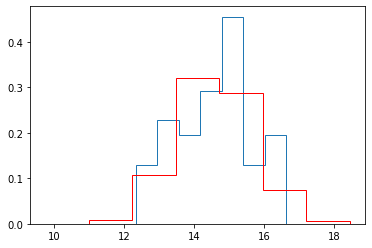

In [29]:
plt.hist(logpop,bins=7,histtype='step',density=True)
plt.hist(lns,bins=7,histtype='step',color='r',density=True)

In [30]:
x = np.sort(logpop)
x2= np.sort(lns)

In [31]:
y=(np.arange(0,len(x))+0.5)/len(x)
y2=(np.arange(0,len(x2))+0.5)/len(x2)
a,b = np.polyfit(x,y,1)
y3=np.array([0,1])
x3=(y3-b)/a

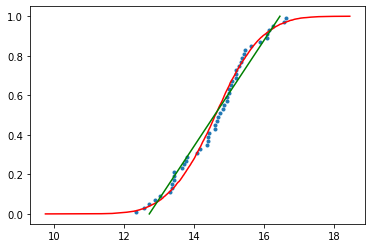

In [32]:
plt.plot(x,y,marker='.',linestyle='none')
plt.plot(x2,y2,c='r')
plt.plot()
plt.plot(x3,y3,c='g')

In [33]:
#ln_s_in, ln_seats = divisor_method(apportionment['pop'], s_tot,lognormal_apportionment,pop_g=pop_g,sigma=std)
#apportionment['LN'] =ln_seats.astype('int')
#print(apportionment)

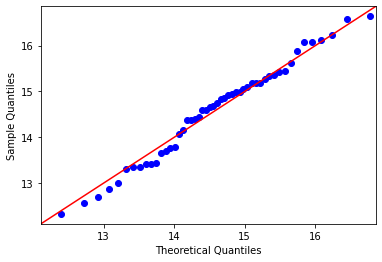

In [34]:
fig = sm.qqplot(x, line='45', loc = mean, scale = std)

In [35]:
logpops = np.log(df.astype('float'))
print (logpops)

                     2020       2010       2000       1990       1980  \
State                                                                   
Alabama         15.430941  15.384748  15.310913  15.217336  15.173935   
Alaska          13.509095  13.489120  13.351780  13.221207  12.900422   
Arizona         15.783870  15.673791  15.452697  15.117876  14.815358   
Arkansas        14.918698  14.889225  14.801228  14.675120  14.642101   
California      17.493753  17.435629  17.339834  17.211335  16.979658   
Colorado        15.570290  15.433894  15.276885  15.011828  14.876364   
Connecticut     15.098747  15.091328  15.042086  15.008120  14.949354   
Delaware        13.806305  13.711124  13.573526  13.413085  13.296695   
Florida         16.886838  16.754713  16.589903  16.380718  16.091751   
Georgia         16.188114  16.090474  15.920495  15.688607  15.513740   
Hawaii          14.194041  14.128028  14.011605  13.924611  13.779883   
Idaho           14.426024  14.268812  14.075776  13

In [36]:
logpops = logpops - logpops.mean()
logpops.mean()


2020   -7.815970e-16
2010   -3.161915e-15
2000   -1.776357e-15
1990   -6.252776e-15
1980   -3.801404e-15
1970   -5.684342e-16
1960    1.101341e-15
dtype: float64

In [37]:
logpops = logpops/logpops.std()

In [38]:
logpops.std()


2020    1.0
2010    1.0
2000    1.0
1990    1.0
1980    1.0
1970    1.0
1960    1.0
dtype: float64

In [39]:
logpops


,2020,2010,2000,1990,1980,1970,1960
State,,,,,,,
Alabama,0.207694,0.224663,0.243954,0.273914,0.317760,0.326603,0.389058
Alaska,-1.669804,-1.635771,-1.677233,-1.687665,-1.909446,-1.966112,-2.103995
Arizona,0.552479,0.508341,0.382991,0.176175,-0.033514,-0.299156,-0.469666
Arkansas,-0.292729,-0.261659,-0.255859,-0.258916,-0.203242,-0.221060,-0.174540
California,2.222904,2.237469,2.233577,2.233401,2.086703,1.977958,1.855760
Colorado,0.343827,0.272898,0.210585,0.071963,0.026249,-0.092440,-0.191590
Connecticut,-0.116835,-0.063309,-0.019666,0.068319,0.097753,0.203816,0.152376
Delaware,-1.379452,-1.417888,-1.459782,-1.499108,-1.521244,-1.405091,-1.469406
Florida,1.629995,1.569195,1.498172,1.417161,1.216881,0.965789,0.777365


In [40]:
logpops = pd.DataFrame(logpops)

In [41]:
logpops

,2020,2010,2000,1990,1980,1970,1960
State,,,,,,,
Alabama,0.207694,0.224663,0.243954,0.273914,0.317760,0.326603,0.389058
Alaska,-1.669804,-1.635771,-1.677233,-1.687665,-1.909446,-1.966112,-2.103995
Arizona,0.552479,0.508341,0.382991,0.176175,-0.033514,-0.299156,-0.469666
Arkansas,-0.292729,-0.261659,-0.255859,-0.258916,-0.203242,-0.221060,-0.174540
California,2.222904,2.237469,2.233577,2.233401,2.086703,1.977958,1.855760
Colorado,0.343827,0.272898,0.210585,0.071963,0.026249,-0.092440,-0.191590
Connecticut,-0.116835,-0.063309,-0.019666,0.068319,0.097753,0.203816,0.152376
Delaware,-1.379452,-1.417888,-1.459782,-1.499108,-1.521244,-1.405091,-1.469406
Florida,1.629995,1.569195,1.498172,1.417161,1.216881,0.965789,0.777365


In [42]:
logpops.columns

Int64Index([2020, 2010, 2000, 1990, 1980, 1970, 1960], dtype='int64', name='')

In [43]:
logpops[2020]

State
Alabama           0.207694
Alaska           -1.669804
Arizona           0.552479
Arkansas         -0.292729
California        2.222904
Colorado          0.343827
Connecticut      -0.116835
Delaware         -1.379452
Florida           1.629995
Georgia           0.947394
Hawaii           -1.000664
Idaho            -0.774034
Illinois          1.121889
Indiana           0.500831
Iowa             -0.236470
Kansas           -0.316648
Kentucky          0.100936
Louisiana         0.133350
Maine            -1.067500
Maryland          0.409665
Massachusetts     0.535207
Michigan          0.887206
Minnesota         0.331514
Mississippi      -0.309021
Missouri          0.405708
Montana          -1.290396
Nebraska         -0.711384
Nevada           -0.262502
New Hampshire    -1.056453
New Jersey        0.807517
New Mexico       -0.636281
New York          1.566626
North Carolina    0.922362
North Dakota     -1.613561
Ohio              1.041419
Oklahoma         -0.025106
Oregon            0.04

In [44]:
logpopslist = np.empty_like(logpops[2020])

In [45]:
logpopslist = np.append([logpops[2020]],[logpops[2010],logpops[2000],logpops[1990],logpops[1980],logpops[1970],logpops[1960]])

In [46]:
logpopslist

array([ 0.20769384, -1.6698037 ,  0.55247876, -0.29272912,  2.22290433,
        0.34382696, -0.11683484, -1.37945218,  1.62999524,  0.94739398,
       -1.00066397, -0.77403378,  1.12188932,  0.50083134, -0.23647028,
       -0.31664754,  0.10093627,  0.13334981, -1.06750045,  0.40966455,
        0.53520721,  0.88720649,  0.33151417, -0.30902075,  0.40570844,
       -1.2903955 , -0.71138375, -0.26250218, -1.05645331,  0.80751706,
       -0.63628141,  1.56662623,  0.92236196, -1.61356059,  1.0414191 ,
       -0.02510624,  0.04111503,  1.13619143, -1.27898136,  0.22590743,
       -1.48675494,  0.51888009,  1.92528855, -0.21144153, -1.80111549,
        0.73782543,  0.62567924, -0.7989293 ,  0.36311607, -1.90646611,
        0.22466343, -1.63577096,  0.50834057, -0.26165928,  2.23746886,
        0.27289779, -0.06330857, -1.41788814,  1.56919493,  0.91728787,
       -1.0087241 , -0.87055366,  1.19159733,  0.52185014, -0.21978354,
       -0.2828196 ,  0.12757815,  0.1724125 , -1.03328945,  0.40

In [47]:
logpopslist = np.sort(logpopslist)
logpopslist

array([-2.10399495, -1.96611185, -1.9114593 , -1.90944603, -1.90646611,
       -1.88721451, -1.87537281, -1.87292376, -1.87005386, -1.80111549,
       -1.76837221, -1.75106437, -1.75094062, -1.70738321, -1.69987012,
       -1.68766489, -1.67723261, -1.6698328 , -1.6698037 , -1.66475836,
       -1.65438877, -1.63577096, -1.61356059, -1.60072873, -1.59556898,
       -1.54011851, -1.52124431, -1.5124962 , -1.51049226, -1.49910844,
       -1.49564714, -1.48675494, -1.46940554, -1.45978198, -1.45415092,
       -1.43095121, -1.41788814, -1.40509094, -1.37945218, -1.37624898,
       -1.32093529, -1.32002861, -1.31844988, -1.2903955 , -1.28932126,
       -1.27898136, -1.26266311, -1.24803015, -1.23259416, -1.21811079,
       -1.18238358, -1.17932791, -1.17495461, -1.15503345, -1.14392148,
       -1.14344036, -1.1211891 , -1.0977851 , -1.09402988, -1.09398943,
       -1.09193949, -1.08344771, -1.07552963, -1.07371222, -1.0695187 ,
       -1.06750045, -1.06618365, -1.05645331, -1.04789745, -1.04

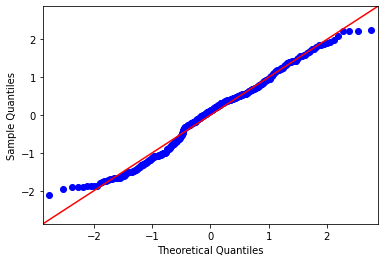

In [48]:
fig = sm.qqplot(logpopslist, line='45')


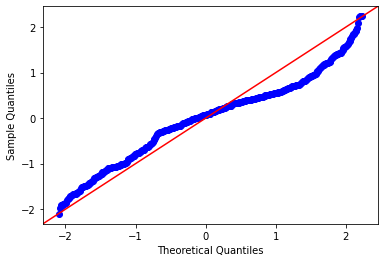

In [49]:
fig = sm.qqplot(logpopslist,uniform,loc = np.min(logpopslist),scale = max(logpopslist)-min(logpopslist), line='45')

(array([0.00115014, 0.        , 0.        , 0.00115014, 0.        ,
        0.        , 0.        , 0.        , 0.00115014, 0.        ,
        0.00230028, 0.00115014, 0.        , 0.00115014, 0.00115014,
        0.        , 0.00115014, 0.00115014, 0.00345042, 0.00460055,
        0.00345042, 0.00460055, 0.01265153, 0.01265153, 0.01265153,
        0.0149518 , 0.02300277, 0.01955236, 0.02530305, 0.04945596,
        0.04485541, 0.04600555, 0.06785818, 0.08165984, 0.08856068,
        0.0862604 , 0.10581276, 0.12306484, 0.16331969, 0.15066816,
        0.16216955, 0.17597121, 0.22082662, 0.19552357, 0.24267926,
        0.26453189, 0.27718342, 0.28063383, 0.28178397, 0.34389146,
        0.32548924, 0.36344382, 0.34159118, 0.37839562, 0.39219728,
        0.3956477 , 0.40944936, 0.34734188, 0.41750033, 0.37034465,
        0.36574409, 0.31283772, 0.34619174, 0.29788591, 0.26683217,
        0.26108148, 0.26568203, 0.25073023, 0.20702496, 0.20472468,
        0.16561997, 0.14836789, 0.13916678, 0.12

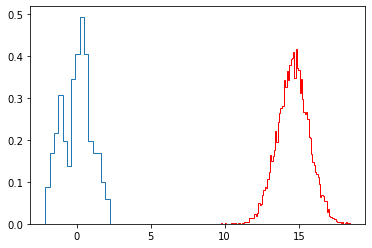

In [50]:
plt.hist(logpopslist,bins=15,histtype='step',density=True)
plt.hist(lns,bins=100,histtype='step',color='r',density=True)

In [51]:
lns = np.log(np.random.lognormal(size=10000))

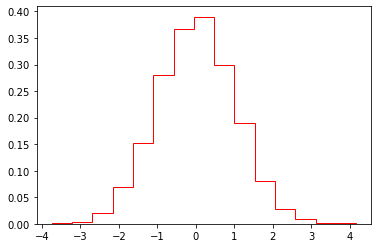

In [52]:
x=plt.hist(lns,bins=15,histtype='step',color='r',density=True)

In [53]:
x = np.sort(logpopslist)
x2= np.sort(lns)

In [54]:
y=(np.arange(0,len(x))+0.5)/len(x)
y2=(np.arange(0,len(x2))+0.5)/len(x2)
a,b = np.polyfit(x,y,1)
y3=np.array([0,1])
x3=(y3-b)/a

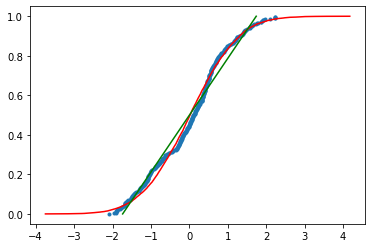

In [55]:
plt.plot(x,y,marker='.',linestyle='none')
plt.plot(x2,y2,c='r')
plt.plot()
plt.plot(x3,y3,c='g')

In [56]:
allpopslist = np.exp(logpopslist)

In [57]:
allpopslist

array([0.1219682 , 0.14000014, 0.14786445, 0.14816244, 0.14860461,
       0.1514932 , 0.1532978 , 0.1536737 , 0.15411536, 0.1651146 ,
       0.17061048, 0.17358908, 0.17361057, 0.1813397 , 0.18270725,
       0.1849509 , 0.18689046, 0.18827854, 0.18828402, 0.18923638,
       0.19120889, 0.19480213, 0.19917716, 0.20174944, 0.20279311,
       0.2143557 , 0.21843991, 0.22035923, 0.22080126, 0.22332918,
       0.22410353, 0.22610519, 0.23006221, 0.23228691, 0.23359862,
       0.2390814 , 0.24222502, 0.24534474, 0.25171641, 0.252524  ,
       0.26688557, 0.26712766, 0.26754972, 0.27516193, 0.27545768,
       0.27832066, 0.28289963, 0.28706972, 0.29153531, 0.29578845,
       0.30654719, 0.30748533, 0.308833  , 0.315047  , 0.31856731,
       0.31872062, 0.32589205, 0.33360918, 0.33486431, 0.33487785,
       0.33556504, 0.33842671, 0.34111704, 0.34173756, 0.34317365,
       0.34386696, 0.34432006, 0.34768676, 0.35067428, 0.35278781,
       0.35583453, 0.35694   , 0.36320299, 0.36468398, 0.36763

In [58]:
apportionment=pd.DataFrame()
apportionment['pop'] = allpopslist
print(apportionment)

          pop
0    0.121968
1    0.140000
2    0.147864
3    0.148162
4    0.148605
..        ...
345  8.058305
346  9.234111
347  9.331547
348  9.333188
349  9.369586

[350 rows x 1 columns]


In [59]:
s_tot=435*7
wf_s_in, wf_seats = divisor_method(apportionment['pop'], s_tot,webster_for_families)
apportionment['WF'] =wf_seats
Adams_s_in, Adams_seats = divisor_method(apportionment['pop'], s_tot,adams)
apportionment['Ad'] =Adams_seats.astype('int')
s_in= np.empty(5)
seats = np.empty([5,len(apportionment['pop'])])
for beta in range(-2,3):
    s_in[beta], seats[beta] = divisor_method(apportionment['pop'], s_tot,beta_apportionment,beta=beta)
    apportionment[str(beta)] =seats[beta].astype('int')
Jefferson_s_in, Jefferson_seats = divisor_method(apportionment['pop'], s_tot,jefferson)
apportionment['Jf'] =Jefferson_seats.astype('int')
Ham_s_in, Ham_seats = hamilton_method(apportionment['pop'], s_tot,hamilton_for_states)
apportionment['HS'] =Ham_seats.astype('int')
HamF_s_in, HamF_seats = hamilton_method(apportionment['pop'], s_tot,hamilton_for_families)
apportionment['HF'] =HamF_seats.astype('int')
logpop= np.log(apportionment['pop'].astype('float'))
mean = np.mean(logpop)
std = np.std(logpop)
pop_g=np.exp(mean)
ln_s_in, ln_seats = divisor_method(apportionment['pop'], s_tot,lognormal_apportionment,pop_g=pop_g,sigma=std)
apportionment['LN'] =ln_seats.astype('int')
apportionment['q'] = (apportionment['pop']*s_tot/apportionment['pop'].sum()).astype('float')
apportionment['f'] = apportionment['q'].apply(np.floor).astype('int')
print(apportionment)

          pop  WF  Ad  -2  -1   0   1   2  Jf  HS  HF  LN          q   f
0    0.121968   0   1   1   1   1   1   1   0   1   0   1   0.670407   0
1    0.140000   0   1   1   1   1   1   1   0   1   0   1   0.769521   0
2    0.147864   1   1   1   1   1   1   1   0   1   1   1   0.812748   0
3    0.148162   1   1   1   1   1   1   1   0   1   1   1   0.814385   0
4    0.148605   1   1   1   1   1   1   1   0   1   1   1   0.816816   0
..        ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..        ...  ..
345  8.058305  44  42  44  44  44  44  44  46  44  44  44  44.293049  44
346  9.234111  51  48  51  51  51  51  51  53  51  51  51  50.755950  50
347  9.331547  51  49  51  51  51  51  51  54  51  51  51  51.291514  51
348  9.333188  51  49  51  51  51  51  51  54  51  51  51  51.300533  51
349  9.369586  52  49  51  51  51  51  51  54  51  52  51  51.500596  51

[350 rows x 14 columns]


In [60]:
family = apportionment.drop('pop',axis=1).groupby('f').sum()
print(family)

     WF   Ad   -2   -1    0    1    2   Jf   HS   HF   LN           q
f                                                                    
0    12   14   14   14   14   14   14    3   14   12   14   12.001458
1    88  111   92   92   89   89   87   65   88   88   89   88.450746
2    76   87   78   77   77   77   76   67   76   76   77   76.342144
3    38   41   37   37   37   37   37   35   37   38   37   37.598416
4   137  146  136  136  136  136  136  129  136  137  136  137.040475
5   138  144  138  138  138  138  138  133  138  137  138  137.480704
6   136  138  136  136  136  136  136  133  136  136  136  135.805135
7   150  153  153  153  153  153  153  150  153  150  153  149.832408
8   219  219  218  218  219  218  219  218  218  219  219  218.835819
9   199  199  198  198  199  199  199  200  199  199  199  198.589463
10  105  104  106  106  106  106  106  106  106  105  106  105.113036
11  125  123  123  123  123  123  123  126  123  125  123  125.077458
12   75   73   74   

In [61]:
bias=pd.DataFrame()
for j in range(12):
    bias.loc[:,j] = family.iloc[:,j]- family.iloc[:,11]
bias.columns= family.columns
print(bias)



error=pd.DataFrame()

for j in range(12):
    error.loc[:,j] = np.abs(family.iloc[:,j]- family.iloc[:,11])
error.columns = family.columns
print (error.sum())


          WF         Ad        -2        -1         0         1         2  \
f                                                                           
0  -0.001458   1.998542  1.998542  1.998542  1.998542  1.998542  1.998542   
1  -0.450746  22.549254  3.549254  3.549254  0.549254  0.549254 -1.450746   
2  -0.342144  10.657856  1.657856  0.657856  0.657856  0.657856 -0.342144   
3   0.401584   3.401584 -0.598416 -0.598416 -0.598416 -0.598416 -0.598416   
4  -0.040475   8.959525 -1.040475 -1.040475 -1.040475 -1.040475 -1.040475   
5   0.519296   6.519296  0.519296  0.519296  0.519296  0.519296  0.519296   
6   0.194865   2.194865  0.194865  0.194865  0.194865  0.194865  0.194865   
7   0.167592   3.167592  3.167592  3.167592  3.167592  3.167592  3.167592   
8   0.164181   0.164181 -0.835819 -0.835819  0.164181 -0.835819  0.164181   
9   0.410537   0.410537 -0.589463 -0.589463  0.410537  0.410537  0.410537   
10 -0.113036  -1.113036  0.886964  0.886964  0.886964  0.886964  0.886964   

In [62]:
total = pd.DataFrame()
for j in [2020,2010,2000,1990,1980,1970,1960]:
    apportionment=pd.DataFrame()
    apportionment['pop'] = df[j]
    apportionment = apportionment.sort_values(by=['pop'])
    s_tot=435
    wf_s_in, wf_seats = divisor_method(apportionment['pop'], s_tot,webster_for_families)
    apportionment['WF'] =wf_seats
    Adams_s_in, Adams_seats = divisor_method(apportionment['pop'], s_tot,adams)
    apportionment['Ad'] =Adams_seats.astype('int')
    s_in= np.empty(5)
    seats = np.empty([5,len(apportionment['pop'])])
    for beta in range(-2,3):
        s_in[beta], seats[beta] = divisor_method(apportionment['pop'], s_tot,beta_apportionment,beta=beta)
        apportionment[str(beta)] =seats[beta].astype('int')
    Jefferson_s_in, Jefferson_seats = divisor_method(apportionment['pop'], s_tot,jefferson)
    apportionment['Jf'] =Jefferson_seats.astype('int')
    Ham_s_in, Ham_seats = hamilton_method(apportionment['pop'], s_tot,hamilton_for_states)
    apportionment['HS'] =Ham_seats.astype('int')
    HamF_s_in, HamF_seats = hamilton_method(apportionment['pop'], s_tot,hamilton_for_families)
    apportionment['HF'] =HamF_seats.astype('int')
    logpop= np.log(apportionment['pop'].astype('float'))
    mean = np.mean(logpop)
    std = np.std(logpop)
    pop_g=np.exp(mean)
    ln_s_in, ln_seats = divisor_method(apportionment['pop'], s_tot,lognormal_apportionment,pop_g=pop_g,sigma=std)
    apportionment['LN'] =ln_seats.astype('int')
    apportionment['q'] = (apportionment['pop']*s_tot/apportionment['pop'].sum()).astype('float')
    apportionment['f'] = apportionment['q'].apply(np.floor).astype('int')
    total = total.append(apportionment)
family = total.drop('pop',axis=1).groupby('f').sum()
bias=pd.DataFrame()
for k in range(12):
        bias.loc[:,k] = family.iloc[:,k]- family.iloc[:,11]
bias.columns= family.columns
print(bias)
error=pd.DataFrame()
for k in range(12):
        error.loc[:,k] = np.abs(family.iloc[:,k]- family.iloc[:,11])
error.columns = family.columns
print (error.sum())


          WF         Ad        -2        -1         0         1         2  \
f                                                                           
0   1.385556   3.385556  3.385556  3.385556  3.385556  3.385556  2.385556   
1  -0.291534  23.708466  5.708466  2.708466  2.708466 -0.291534 -1.291534   
2  -0.501479  11.498521  0.498521  0.498521  0.498521 -0.501479 -0.501479   
3   1.705838   2.705838 -0.294162 -0.294162 -0.294162 -0.294162 -0.294162   
4  -0.295400   7.704600 -1.295400 -0.295400 -0.295400 -0.295400 -1.295400   
5   0.106302   6.106302  1.106302  1.106302  1.106302  0.106302  0.106302   
6   0.390424   3.390424 -0.609576 -0.609576 -0.609576  0.390424  0.390424   
7   1.078723   4.078723  1.078723  1.078723  1.078723  1.078723  1.078723   
8   0.156558   0.156558 -0.843442 -0.843442 -0.843442 -0.843442 -0.843442   
9   0.501627  -0.498373 -0.498373 -0.498373 -0.498373 -0.498373 -0.498373   
10 -1.404932  -1.404932 -2.404932 -2.404932 -2.404932 -0.404932  0.595068   

In [63]:
errorlogs=pd.DataFrame()
for k in range(12):
        errorlogs.loc[:,k] = np.abs(np.log(family.iloc[:,k])- np.log(family.iloc[:,11]))
errorlogs.columns = family.columns
print (errorlogs.sum())

WF    0.346193
Ad    1.885249
-2    0.534910
-1    0.483804
0     0.483804
1     0.422627
2     0.398122
Jf    2.515767
HS    0.438770
HF    0.346193
LN    0.383022
q     0.000000
dtype: float64
